# Machine learning 22 : Support Vactor Regression

### **1. What is SVR?**

SVR is the **regression version of Support Vector Machine (SVM)**. While SVM is mostly used for classification, SVR is used when the target variable is **continuous** (like predicting house prices, temperature, or salary).

The main idea of SVR is to **fit a function to the data** in a way that:

* Most data points lie **within a margin of tolerance** (epsilon, ε).
* The model is **as flat as possible** to avoid overfitting.

### **2. How does SVR work?**

SVR tries to find a function $f(x)$ that predicts the target $y$ with minimal error.

The function can be linear or non-linear:

**Linear case:**

$$
f(x) = w^T x + b
$$

Where:

* $w$ = weight vector
* $b$ = bias term

**Goal:** Keep the deviations from the true value **within ε**. Points outside ε are penalized using a parameter **C**.

### **3. Key Concepts of SVR**

1. **Epsilon (ε) – Insensitive Tube**

   * Defines a margin where errors are ignored.
   * If the prediction is within ±ε of the actual value, no penalty is given.

2. **C – Regularization Parameter**

   * Controls the **trade-off between flatness and tolerance** of errors.
   * Large C → less tolerance for errors (can overfit)
   * Small C → more tolerance for errors (may underfit)

3. **Kernel Functions**

   * SVR can handle **non-linear data** by using kernels (just like SVM).
   * Common kernels:

     * **Linear** → straight-line regression
     * **Polynomial** → curved regression
     * **RBF (Radial Basis Function)** → flexible, good for complex patterns

### **4. Visualization**

* Imagine plotting your data on a graph.
* Draw a **tube** around the regression line with width 2ε.
* Points inside the tube → no penalty
* Points outside → penalized

It looks like this:

```
        o
      o   o
  -------------------  <- Regression line (f(x))
      o   o
        o
```

* Points inside ±ε from the line are “ignored” by SVR.
* Points outside influence the model to adjust.

### **5. Advantages of SVR**

* Works well with **small datasets**.
* Handles **non-linear relationships** via kernels.
* Robust to **outliers** if ε is chosen properly.

### **6. Limitations**

* Choosing **C, ε, and kernel parameters** can be tricky.
* Computationally intensive for **very large datasets**.
* Less intuitive than linear regression.



In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 2. Load Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
# Access the DataFrame directly
df = boston.frame  # already a pandas DataFrame
# View the dataset
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# features and target variable
X = boston.data
y = boston.target

In [4]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 4. Feature scaling (SVR is sensitive to scaling)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [6]:
# fit and only transform both training and test data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [7]:
y_train_reshaped = y_train.values.reshape(-1, 1)  # Reshape for scaler
y_test_reshaped = y_test.values.reshape(-1, 1)    # Reshape for scaler

y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

In [8]:
# 5. Train SVR model (RBF kernel is common)
svr = SVR(kernel="linear", C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'linear'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [9]:
# 6. Predictions
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_pred

array([26.56585952, 32.59066766, 15.93979838, 24.37153348, 18.27736467,
       22.19021944, 18.03014602, 16.69144301, 20.17745334, 20.25735367,
       22.06267274, 18.77065168, -6.40254417, 21.75208395, 17.99922537,
       25.3077583 , 19.44521698,  5.44805186, 39.72491201, 16.86876654,
       26.55342629, 28.69579835, 12.77670095, 24.45839578, 16.14989335,
       12.92200617, 21.74718051, 14.4017956 , 20.18704828, 18.84675813,
       19.9003809 , 24.56717268, 24.90708679, 14.38786038, 15.5705402 ,
       16.62157904, 30.59804244, 19.87158669, 22.14856747, 24.74390783,
       14.52631973, 29.9850672 , 41.57398001, 17.51023567, 26.01400259,
       15.10467949, 14.26120552, 26.08456794, 18.75249393, 28.4590568 ,
       20.4683994 , 32.70815792, 17.23605868, 25.838501  , 37.70513807,
       21.28010727, 17.9245342 , 31.27458773, 24.75671415, 13.62731911,
       23.85177353, 31.10938122, 29.78273846, 15.72373917, 21.76984162,
       14.66797995, 19.56303078, 25.20939093, 29.51896175, 10.63

In [10]:
# 7. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 28.867125213591912
R² Score: 0.6063597980417518


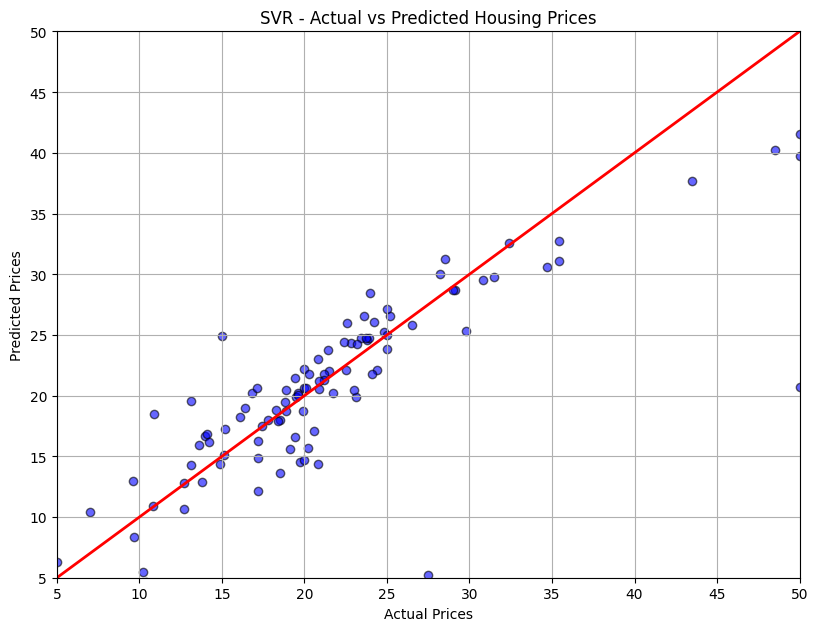

In [11]:
# 8. Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)

plt.grid()
plt.tight_layout()  

plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR - Actual vs Predicted Housing Prices")
plt.show()

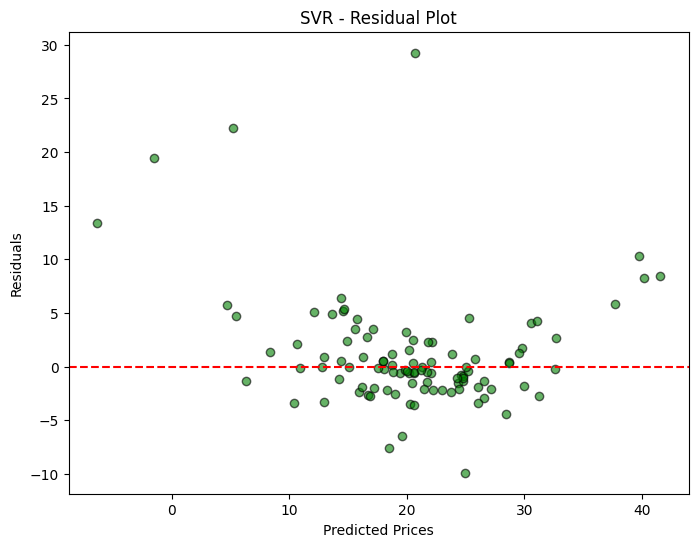

In [12]:
# 9. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color="green", alpha=0.6, edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("SVR - Residual Plot")
plt.show()